In [31]:
import math
from enum import Enum

import numpy
import numpy as np
from matplotlib.image import imread
from matplotlib.image import imsave
from matplotlib.pyplot import imshow
from matplotlib.colors import hsv_to_rgb
from matplotlib.colors import rgb_to_hsv
import matplotlib.pyplot as plt
import sys


class ColorModel(Enum):
    rgb = 0
    hsv = 1
    hsi = 2
    hsl = 3
    gray = 4  # obraz 2d

In [167]:
class BaseImage:
    data: np.ndarray  # tensor przechowujacy piksele obrazu
    color_model: ColorModel  # atrybut przechowujacy biezacy model barw obrazu

    def __init__(self, path: str) -> None:
        """
        inicjalizator wczytujacy obraz do atrybutu data na podstawie sciezki
        """
        self.data = imread(path)
        pass

    def save_img(self, path: str) -> None:
        """
        metoda zapisujaca obraz znajdujacy sie w atrybucie data do pliku
        """
        imsave(path, self.data)
        pass

    def show_img(self) -> None:
        """
        metoda wyswietlajaca obraz znajdujacy sie w atrybucie data
        """
        imshow(self.data)
        pass

    def get_layer(self, layer_id: int) -> 'BaseImage':
        """
        metoda zwracajaca warstwe o wskazanym indeksie
        """
        temp: BaseImage = self
        temp.data = temp.data[:, :, layer_id]
        return temp

        pass


    def to_hsv(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsv
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """

        M: np.ndarray = self.data.max(axis=2)
        m: np.ndarray = self.data.min(axis=2)
        V: np.ndarray = M / 255


        S: np.ndarray = np.zeros(M.shape)

        for i in range(0, S.shape[0]):
            for j in range(0, S.shape[1]):
                if M[i, j] > 0:
                    S[i, j] = 1 - (m[i, j]/M[i, j])
                else:
                    S[i, j] = 0


        H: np.ndarray = np.zeros(M.shape)

        R1: np.ndarray = self.data[:, :, 0]
        G2: np.ndarray = self.data[:, :, 1]
        B3: np.ndarray = self.data[:, :, 2]

        R: np.ndarray = self.data[:, :, 0]
        G: np.ndarray = self.data[:, :, 1]
        B: np.ndarray = self.data[:, :, 2]
        R.astype("float64")
        G.astype("float64")
        B.astype("float64")

        for i in range(0, H.shape[0]):
            for j in range(0, H.shape[1]):

                temp: float = (R[i,j]-(1/2)*G[i,j]-(1/2)*B[i,j]) / (math.sqrt(R[i,j]**(2)+G[i,j]**(2)+B[i,j]**(2)-R[i,j]*G[i,j]-R[i,j]*B[i,j]-G[i,j]*B[i,j]))

                R.astype("int8")
                G.astype("int8")
                B.astype("int8")

                if G[i, j] >= B[i, j]:
                    H[i, j] = math.cos(temp)**(-1)
                else:
                    H[i,j] = 360 - math.cos(temp)**(-1)

        H.astype("int16")
        S.astype("int16")
        B.astype("int16")

        test: np.ndarray = hsv_to_rgb(np.stack((H/360, S, V), axis=2))
        print(test)
        imshow(test, vmin=0, vmax=1)


    def to_hsi(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsi
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        pass

    def to_hsl(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsl
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        pass

    def to_rgb(self) -> 'BaseImage':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu rgb
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        pass

[[[0.74117647 0.1254902  0.13724496]
  [0.44313725 0.06666667 0.07316259]
  [0.81568627 0.15294118 0.16552398]
  [0.99215686 0.05882353 0.07952656]
  [0.96078431 0.07843137 0.09783295]]

 [[0.39607843 0.         0.00865123]
  [0.4745098  0.29019608 0.29330865]
  [0.78823529 0.17254902 0.18435566]
  [0.98039216 0.06666667 0.08678556]
  [0.95686275 0.0745098  0.09386028]]

 [[0.81176471 0.28400044 0.2745098 ]
  [0.71764706 0.4631458  0.45882353]
  [0.72156863 0.2        0.21031669]
  [0.95686275 0.08235294 0.10127478]
  [0.96862745 0.08235294 0.10151345]]

 [[0.87843137 0.17716293 0.16470588]
  [0.7372549  0.28994026 0.28235294]
  [0.70196078 0.23137255 0.24067839]
  [0.94901961 0.09803922 0.1161658 ]
  [0.95686275 0.08235294 0.10114278]]

 [[0.85882353 0.17680334 0.16470588]
  [0.72156863 0.28196424 0.2745098 ]
  [0.72156863 0.24313725 0.25249445]
  [0.91764706 0.06666667 0.08525013]
  [0.94901961 0.09019608 0.10851539]]]


C:\Users\Wiktor\AppData\Local\Temp\ipykernel_17088\2038876387.py:74: RuntimeWarning: overflow encountered in ubyte_scalars
  temp: float = (R[i,j]-(1/2)*G[i,j]-(1/2)*B[i,j]) / (math.sqrt(R[i,j]**(2)+G[i,j]**(2)+B[i,j]**(2)-R[i,j]*G[i,j]-R[i,j]*B[i,j]-G[i,j]*B[i,j]))


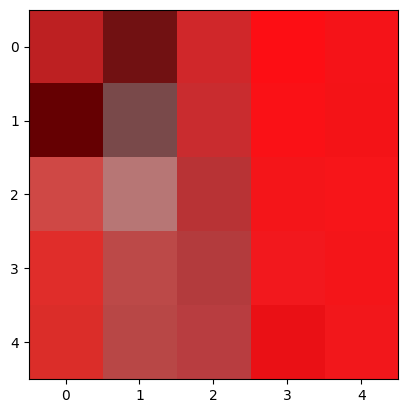

In [168]:
img_arr = imread("lena_small.jpg")
my_image: BaseImage = BaseImage("test.jpg")
my_image.to_hsv()